In [8]:
# Cell 1: Setup and Data Loading

import pandas as pd
import numpy as np
import os

# Scikit-learn is the most important ML library in Python
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# For visualization
import seaborn as sns
import matplotlib.pyplot as plt

# --- Load the PROCESSED Data ---
TICKER = "RELIANCE.NS"
DATA_PATH = "data"
PROCESSED_DATA_FILE = os.path.join(DATA_PATH, f"{TICKER}_processed_data.csv")

df = pd.read_csv(PROCESSED_DATA_FILE, index_col='Date', parse_dates=True)

print("Processed data loaded successfully!")
display(df.head())

Processed data loaded successfully!


,Open,High,Low,Close,Volume,MA50,MA200,MA_Spread,Volatility_20D,ROC_5D,Target
Date,,,,,,,,,,,
2020-10-19,986.757080,1010.562239,977.212384,993.037115,31200385,993.533179,759.323413,234.209766,14.010165,-2.011183,0
2020-10-20,977.552551,994.374852,975.897493,988.026813,18482288,993.713646,760.868137,232.845509,13.996122,-2.313269,0
2020-10-21,963.360168,993.921452,951.185513,983.039108,34082321,994.014726,762.401343,231.613383,14.902208,-4.866383,0
2020-10-22,955.356934,966.942102,948.124726,964.629614,30802210,994.072765,763.795530,230.277235,17.867445,-7.100436,0
2020-10-23,958.122986,968.075765,950.573367,954.926269,23422125,993.873256,765.170277,228.702979,21.495000,-4.920993,0


In [9]:
X = df.drop('Target', axis=1)
Y = df['Target']
X_train, X_test, Y_train, Y_test = train_test_split(
    X,
    Y,
    test_size=0.2,
    shuffle=False,
    random_state=42
)
print("--- Data Splitting Complete ---")
print("X_train shape:",X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

--- Data Splitting Complete ---
X_train shape: (964, 10)
X_test shape: (241, 10)
Y_train shape: (964,)
Y_test shape: (241,)


In [10]:
# --- Cell 3: Feature Scaling ---
# We'll scale our data to have a mean of 0 and a standard deviation of 1.

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler ONLY on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Use the SAME scaler to transform the test data
X_test_scaled = scaler.transform(X_test)

print("--- Feature Scaling Complete ---")
print("The data has been transformed. Here's a sample of the scaled training data:")
# We wrap it in a DataFrame for nice printing with column names
display(pd.DataFrame(X_train_scaled, index=X_train.index, columns=X_train.columns).head())

--- Feature Scaling Complete ---
The data has been transformed. Here's a sample of the scaled training data:


,Open,High,Low,Close,Volume,MA50,MA200,MA_Spread,Volatility_20D,ROC_5D
Date,,,,,,,,,,
2020-10-19,-0.949957,-0.877687,-0.948075,-0.921430,1.523394,-0.919516,-2.274737,2.843467,-1.248142,-0.680815
2020-10-20,-1.002543,-0.969860,-0.955632,-0.950146,0.281863,-0.918395,-2.264101,2.822196,-1.249360,-0.771923
2020-10-21,-1.083625,-0.972441,-1.097658,-0.978733,1.804726,-0.916524,-2.253545,2.802984,-1.170756,-1.541934
2020-10-22,-1.129348,-1.126064,-1.115249,-1.084245,1.484524,-0.916164,-2.243946,2.782151,-0.913517,-2.215718
2020-10-23,-1.113545,-1.119609,-1.101176,-1.139859,0.764086,-0.917403,-2.234480,2.757605,-0.598820,-1.558405


--- Training the Logistic Regression Model ---
Model training complete!

--- Making Predictions on the Test Set ---

--- Evaluating Model Performance ---
Accuracy:0.4979

Classification Report:
              precision    recall  f1-score   support

    Down (0)       0.76      0.12      0.21       132
      Up (1)       0.47      0.95      0.63       109

    accuracy                           0.50       241
   macro avg       0.62      0.54      0.42       241
weighted avg       0.63      0.50      0.40       241


Confusion Matrix:


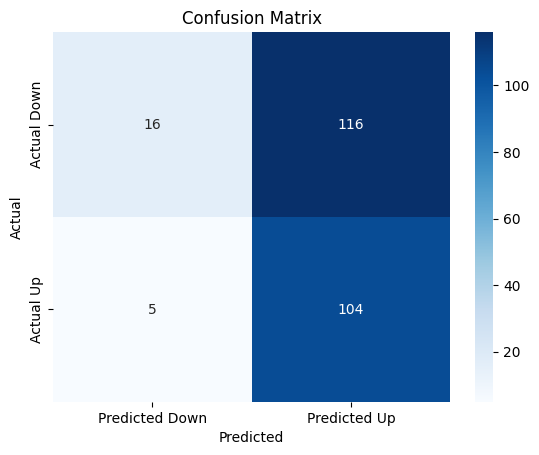

In [13]:
print("--- Training the Logistic Regression Model ---")
model = LogisticRegression(random_state=42)

model.fit(X_train_scaled, Y_train)
print("Model training complete!")

print("\n--- Making Predictions on the Test Set ---")
y_pred = model.predict(X_test_scaled)

print("\n--- Evaluating Model Performance ---")

accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy:{accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(Y_test, y_pred, target_names=['Down (0)', 'Up (1)']))

print("\nConfusion Matrix:")
cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Down', 'Predicted Up'], 
            yticklabels=['Actual Down', 'Actual Up'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

--- Training the XGBoost Model ---


d:\stock-trend-predictor\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:23:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost model training complete!

--- Making Predictions with XGBoost ---

--- Evaluating XGBoost Model Performance ---
XGBoost Accuracy: 0.4772

Classification Report:
              precision    recall  f1-score   support

    Down (0)       0.52      0.66      0.58       132
      Up (1)       0.38      0.26      0.31       109

    accuracy                           0.48       241
   macro avg       0.45      0.46      0.44       241
weighted avg       0.46      0.48      0.46       241


Confusion Matrix:


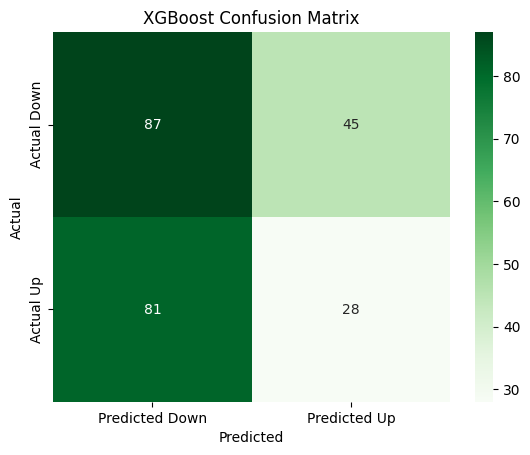

In [14]:
import xgboost as xgb

print("--- Training the XGBoost Model ---")

xgb_model = xgb.XGBClassifier(
    objective='binary:logistic', # Our goal is binary classification
    eval_metric='logloss',       # The metric to optimize during training
    use_label_encoder=False,     # A setting to avoid a common warning
    random_state=42
)
xgb_model.fit(X_train_scaled, Y_train)
print("XGBoost model training complete!")

print("\n--- Making Predictions with XGBoost ---")
y_pred_xgb = xgb_model.predict(X_test_scaled)

print("\n--- Evaluating XGBoost Model Performance ---")
accuracy_xgb = accuracy_score(Y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")

print("\nClassification Report:")
print(classification_report(Y_test, y_pred_xgb, target_names=['Down (0)', 'Up (1)']))

print("\nConfusion Matrix:")
cm_xgb = confusion_matrix(Y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Predicted Down', 'Predicted Up'], 
            yticklabels=['Actual Down', 'Actual Up'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost Confusion Matrix')
plt.show()

In [16]:
# --- Cell 6: Hyperparameter Tuning with GridSearchCV ---
from sklearn.model_selection import GridSearchCV
import xgboost as xgb # Re-importing just in case

print("--- Starting Hyperparameter Tuning for XGBoost ---")
print("This may take a few minutes to complete...")

# 1. Define the grid of parameters we want to search.
# These are some of the most important "knobs" for XGBoost.
param_grid = {
    'n_estimators': [100, 200, 300],    # The number of trees in the forest.
    'max_depth': [3, 5, 7],             # The maximum depth of a tree.
    'learning_rate': [0.01, 0.1],       # How quickly the model learns.
    'subsample': [0.8, 1.0]              # The fraction of data to use for each tree.
}

# 2. Initialize the XGBoost model again
xgb_model_for_tuning = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

# 3. Initialize GridSearchCV
# cv=3 means 3-fold cross-validation.
# scoring='f1' tells it to optimize for the F1-score, not just accuracy.
# n_jobs=-1 uses all your computer's CPU cores to speed up the process.
# verbose=2 will print out progress updates so we can see it working.
grid_search = GridSearchCV(
    estimator=xgb_model_for_tuning,
    param_grid=param_grid,
    scoring='f1',
    cv=3,
    verbose=2,
    n_jobs=-1
)

# 4. Run the search process. This is the step that takes time!
grid_search.fit(X_train_scaled, Y_train)

# 5. Get the best parameters and the best model
print("\n--- Tuning Complete ---")
print(f"Best Parameters found: {grid_search.best_params_}")
print(f"Best F1-Score on validation data: {grid_search.best_score_:.4f}")

# The grid_search object now holds the best version of the model it found
best_xgb_model = grid_search.best_estimator_

--- Starting Hyperparameter Tuning for XGBoost ---
This may take a few minutes to complete...
Fitting 3 folds for each of 36 candidates, totalling 108 fits

--- Tuning Complete ---
Best Parameters found: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 1.0}
Best F1-Score on validation data: 0.3801


d:\stock-trend-predictor\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:35:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


--- Final Evaluation of the Tuned XGBoost Model ---
Tuned XGBoost Accuracy: 0.4896

Classification Report for Tuned Model:
              precision    recall  f1-score   support

    Down (0)       0.68      0.13      0.22       132
      Up (1)       0.47      0.93      0.62       109

    accuracy                           0.49       241
   macro avg       0.57      0.53      0.42       241
weighted avg       0.58      0.49      0.40       241


Confusion Matrix for Tuned Model:


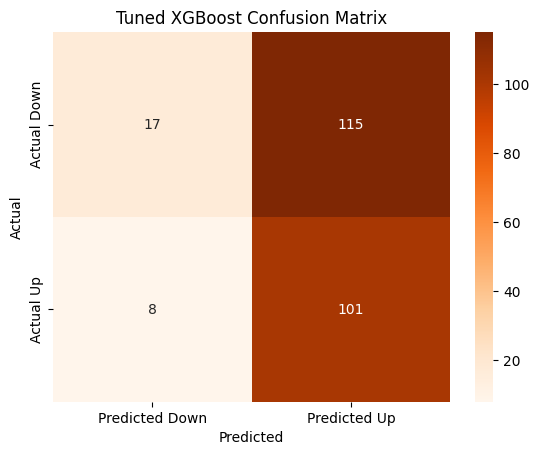

In [18]:
# --- Cell 7: Evaluate the Tuned XGBoost Model on the Test Set ---

print("--- Final Evaluation of the Tuned XGBoost Model ---")

# 1. Make Predictions using the BEST model found by GridSearchCV
y_pred_tuned = best_xgb_model.predict(X_test_scaled)

# 2. Evaluate the Tuned Model's Performance
accuracy_tuned = accuracy_score(Y_test, y_pred_tuned)
print(f"Tuned XGBoost Accuracy: {accuracy_tuned:.4f}")

print("\nClassification Report for Tuned Model:")
print(classification_report(Y_test, y_pred_tuned, target_names=['Down (0)', 'Up (1)']))

print("\nConfusion Matrix for Tuned Model:")
cm_tuned = confusion_matrix(Y_test, y_pred_tuned)
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Predicted Down', 'Predicted Up'], 
            yticklabels=['Actual Down', 'Actual Up'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Tuned XGBoost Confusion Matrix')
plt.show()

In [19]:
# --- Cell 8: Save the Final Model and Scaler ---
import joblib
import os

# Create a directory to save the model artifacts if it doesn't exist
os.makedirs('model', exist_ok=True)

# Save the scaler object to a file
joblib.dump(scaler, 'model/scaler.joblib')
print("Scaler saved to model/scaler.joblib")

# Save the best XGBoost model to a file
joblib.dump(best_xgb_model, 'model/xgb_model.joblib')
print("Best XGBoost model saved to model/xgb_model.joblib")

Scaler saved to model/scaler.joblib
Best XGBoost model saved to model/xgb_model.joblib


In [20]:
# This will select the very first row of our UN-SCALED test set (X_test)
# and print it out in the perfect JSON format for our API.
first_test_case = X_test.iloc[0]
print(first_test_case.to_json(indent=4))

{
    "Open":1473.9133300781,
    "High":1480.0886175335,
    "Low":1440.1232367943,
    "Close":1451.2039809868,
    "Volume":22349376.0,
    "MA50":1503.8526905066,
    "MA200":1419.7093175619,
    "MA_Spread":84.1433729447,
    "Volatility_20D":22.1304382551,
    "ROC_5D":-4.0847956508
}
